# ATAC-Seq Raw Data

**Created**: 17 January 2022

## Environment

In [1]:
library(tidyverse)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Calderon *et al.*

### Load Data

In [2]:
meta <- read.csv("03_Functional_Interpretation/metadata/reads_calderon_et_al_atac_seq.txt")

In [3]:
head(meta)

,Run,Assay.Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Cell_type,Center.Name,Consent,⋯,LibrarySelection,LibrarySource,lineage,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study,treatment
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR7650729,ATAC-seq,130,7671684082,PRJNA484801,SAMN09769836,3235449960,Bulk_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320229,primary blood,SRP156496,no_treament
2,SRR7650730,ATAC-seq,130,8755083677,PRJNA484801,SAMN09769835,3691300841,Bulk_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320230,primary blood,SRP156496,treatment1
3,SRR7650731,ATAC-seq,131,8483939942,PRJNA484801,SAMN09769834,3602660374,Mem_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320231,primary blood,SRP156496,no_treament
4,SRR7650733,ATAC-seq,132,7063118195,PRJNA484801,SAMN09769832,3012041722,Naive_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320233,primary blood,SRP156496,no_treament
5,SRR7650735,ATAC-seq,130,8705610661,PRJNA484801,SAMN09769830,3659122131,Plasmablasts,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320235,primary blood,SRP156496,no_treament
6,SRR7650736,ATAC-seq,132,8457505958,PRJNA484801,SAMN09769829,3669541907,CD8pos_T,GEO,public,⋯,other,GENOMIC,CD8,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320236,primary blood,SRP156496,no_treament


In [4]:
colnames(meta)

[1] "Run"                 "Assay.Type"          "AvgSpotLen"         
 [4] "Bases"               "BioProject"          "BioSample"          
 [7] "Bytes"               "Cell_type"           "Center.Name"        
[10] "Consent"             "DATASTORE.filetype"  "DATASTORE.provider" 
[13] "DATASTORE.region"    "Donor"               "Experiment"         
[16] "GEO_Accession..exp." "Instrument"          "LibraryLayout"      
[19] "LibrarySelection"    "LibrarySource"       "lineage"            
[22] "Organism"            "Platform"            "ReleaseDate"        
[25] "Sample.Name"         "source_name"         "SRA.Study"          
[28] "treatment"

### Basic Information about Data

There are 175 ATAC-Seq samples from the Calderon *et al.* study.

In [5]:
nrow(meta)

[1] 175

Most samples were run on an Illumina HiSeq 4000. Some were run on an Illumina NovaSeq 6000. All samples runs generated paired-end 76 bp reads.

In [6]:
table(meta$Instrument)
table(meta$LibraryLayout)
table(meta$LibrarySelection)
table(meta$LibrarySource)
table(meta$Platform)


  Illumina HiSeq 4000 Illumina NovaSeq 6000 
                  159                    16 


PAIRED 
   175 


other 
  175 


GENOMIC 
    175 


ILLUMINA 
     175 

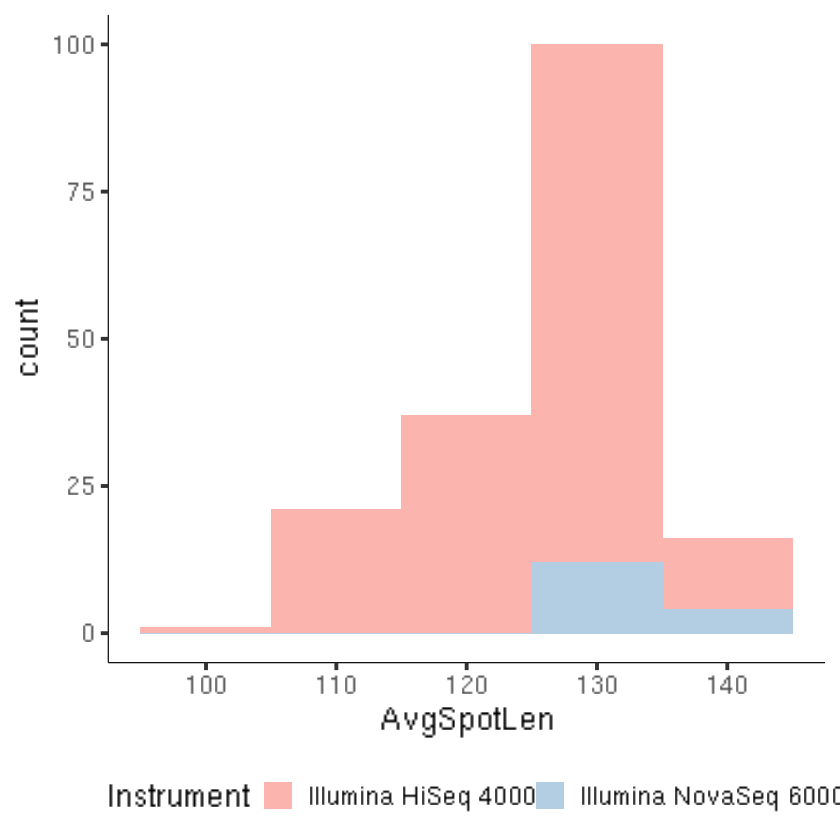

In [7]:
meta %>%
    ggplot() +
    geom_histogram(aes(x=AvgSpotLen, fill=Instrument), binwidth=10) +
    scale_fill_brewer(palette="Pastel1") +
    ggplot_theme

There are 25 different primary cell types.

In [8]:
length(unique(meta$Cell_type))
table(meta$Cell_type)

[1] 25


                  Bulk_B                 CD8pos_T  Central_memory_CD8pos_T 
                       7                        7                        8 
       Effector_CD4pos_T Effector_memory_CD8pos_T      Follicular_T_Helper 
                       7                        8                        9 
           Gamma_delta_T              Immature_NK                Mature_NK 
                       7                        5                       10 
                   Mem_B                Memory_NK             Memory_Teffs 
                       8                        6                        8 
            Memory_Tregs                Monocytes              Myeloid_DCs 
                       8                        9                        3 
                 Naive_B              Naive_CD8_T              Naive_Teffs 
                       7                        8                        9 
             Naive_Tregs                     pDCs             Plasmablasts 
           

These 25 cell types belong to 6 broad cell lineages. Most samples come from CD4 T cells, followed by CD8 T Cells.

In [9]:
length(unique(meta$lineage))
table(meta$lineage)

[1] 6


      B     CD4     CD8      GD MYELOID      NK 
     25      76      31       7      15      21 

In [10]:
meta %>%
    dplyr::select(Cell_type, lineage) %>%
    unique()

,Cell_type,lineage
,<chr>,<chr>
1,Bulk_B,B
3,Mem_B,B
4,Naive_B,B
5,Plasmablasts,B
6,CD8pos_T,CD8
7,Memory_Teffs,CD4
8,Memory_Tregs,CD4
10,Naive_Teffs,CD4
12,Regulatory_T,CD4


Samples were either unstimulated (`no_treament`) or stimulated (`treatment1` or `treatment2`). More than one treatment was used for Mature NK cells, Monocytes, Naive Effector T Cells, and Naive Regulatory T Cells.

In [12]:
table(meta$treatment)
table(meta$Cell_type, meta$treatment)


no_treament  treatment1  treatment2 
         97          71           7 

                          
                           no_treament treatment1 treatment2
  Bulk_B                             4          3          0
  CD8pos_T                           4          3          0
  Central_memory_CD8pos_T            4          4          0
  Effector_CD4pos_T                  4          3          0
  Effector_memory_CD8pos_T           4          4          0
  Follicular_T_Helper                5          4          0
  Gamma_delta_T                      4          3          0
  Immature_NK                        5          0          0
  Mature_NK                          4          4          2
  Mem_B                              4          3          1
  Memory_NK                          6          0          0
  Memory_Teffs                       4          4          0
  Memory_Tregs                       4          4          0
  Monocytes                          3          4          2
  Myeloid_DCs                        3          0         

The samples were generated from 7 donors. 4 of the donors contributed to a large number of samples.

In [14]:
length(unique(meta$Donor))
table(meta$Donor)
sum(table(meta$Donor)[1:4]) / sum(table(meta$Donor))

[1] 7


1001 1002 1003 1004 1008 1010 1011 
  42   41   39   37    8    7    1 

[1] 0.9085714

## Corces *et al.*

### Load Data

In [32]:
meta <- read.csv("03_Functional_Interpretation/metadata/reads_corces_et_al_atac_seq.txt") %>%
    dplyr::filter(Cell_type == "CD14+ monocyte cell")

In [33]:
head(meta)

,Run,Assay.Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Cell_type,Center.Name,Consent,⋯,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,sample_type,source_name,SRA.Study
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR2920475,OTHER,152,1276139712,PRJNA301969,SAMN04262115,504572193,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937385,primary human blood cell from fresh sample,Mono,SRP066100
2,SRR2920488,OTHER,152,2481512024,PRJNA301969,SAMN04262081,1142311304,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937398,primary human blood cell from fresh sample,Mono,SRP066100
3,SRR2920476,OTHER,152,1160170856,PRJNA301969,SAMN04262116,460332567,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937386,primary human blood cell from fresh sample,Mono,SRP066100
4,SRR2920487,OTHER,152,2625527768,PRJNA301969,SAMN04262080,1207718672,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937397,primary human blood cell from fresh sample,Mono,SRP066100
5,SRR2920542,OTHER,152,5824919376,PRJNA301969,SAMN04262124,2888818006,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937452,primary human blood cell from fresh sample,Mono,SRP066100
6,SRR2920543,OTHER,152,7468277560,PRJNA301969,SAMN04262125,3655086815,CD14+ monocyte cell,GEO,public,⋯,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937453,primary human blood cell from fresh sample,Mono,SRP066100


In [34]:
colnames(meta)

[1] "Run"                 "Assay.Type"          "AvgSpotLen"         
 [4] "Bases"               "BioProject"          "BioSample"          
 [7] "Bytes"               "Cell_type"           "Center.Name"        
[10] "Consent"             "DATASTORE.filetype"  "DATASTORE.provider" 
[13] "DATASTORE.region"    "donorid"             "Experiment"         
[16] "GEO_Accession..exp." "Instrument"          "LibraryLayout"      
[19] "LibrarySelection"    "LibrarySource"       "Organism"           
[22] "Platform"            "ReleaseDate"         "Sample.Name"        
[25] "sample_type"         "source_name"         "SRA.Study"

### Basic Information about Data

There are 6 ATAC-Seq samples from the Corces *et al.* study.

In [35]:
nrow(meta)

[1] 6

NextSeq 500 was used for sequencing, with 150 bp reads.

In [36]:
table(meta$Instrument)
table(meta$LibraryLayout)
table(meta$LibrarySelection)
table(meta$LibrarySource)
table(meta$Platform)


NextSeq 500 
          6 


PAIRED 
     6 


other 
    6 


GENOMIC 
      6 


ILLUMINA 
       6 

In [38]:
table(meta$AvgSpotLen)


152 
  6 

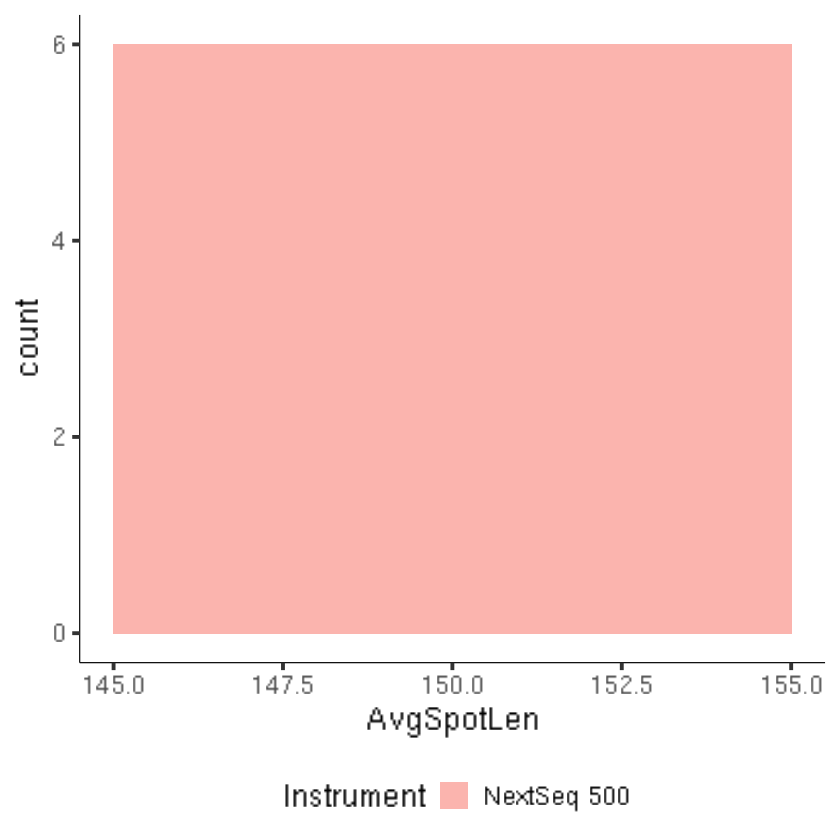

In [37]:
meta %>%
    ggplot() +
    geom_histogram(aes(x=AvgSpotLen, fill=Instrument), binwidth=10) +
    scale_fill_brewer(palette="Pastel1") +
    ggplot_theme

The samples were generated from 3 donors.

In [40]:
length(unique(meta$donor))
table(meta$donor)

[1] 3


4983 6792 7256 
   2    2    2 

## Ram-Mohan *et al.*

### Load Data

In [15]:
meta <- read.csv("03_Functional_Interpretation/metadata/reads_ram_mohan_et_al_atac_seq.txt")

In [16]:
head(meta)

,Run,Age,Assay.Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,BioSampleModel,Bytes,⋯,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,sex,SRA.Study,tissue,treatment
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR11909913,30-40,ATAC-seq,152,1639433088,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15086993,Human,631956173,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,LPS-D1-2,female,SRP265675,blood,LPS challenge Donor 1-2
2,SRR11909914,30-40,ATAC-seq,152,1662692432,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15086992,Human,634797370,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,LPS-D1-1,female,SRP265675,blood,LPS challenge Donor 1-1
3,SRR11909915,30-40,ATAC-seq,152,2794089232,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15087059,Human,1213021149,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,R848-D4-2,female,SRP265675,blood,R848 challenge Donor 4-2
4,SRR11909916,30-40,ATAC-seq,152,2648579632,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15087058,Human,1164278902,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,R848-D4-1,female,SRP265675,blood,R848 challenge Donor 4-1
5,SRR11909917,30-40,ATAC-seq,152,3676962992,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15087057,Human,1633085552,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,LTA-D4-2,female,SRP265675,blood,LTA challenge Donor 4-2
6,SRR11909918,30-40,ATAC-seq,152,2640023248,"Yang Lab\, Stanford Emergency Department",PRJNA636835,SAMN15087056,Human,1139104723,⋯,other,GENOMIC,Homo sapiens,ILLUMINA,2020-06-09T00:00:00Z,LTA-D4-1,female,SRP265675,blood,LTA challenge Donor 4-1


In [17]:
colnames(meta)

[1] "Run"                  "Age"                  "Assay.Type"          
 [4] "AvgSpotLen"           "Bases"                "BIOMATERIAL_PROVIDER"
 [7] "BioProject"           "BioSample"            "BioSampleModel"      
[10] "Bytes"                "Cell_type"            "Center.Name"         
[13] "Consent"              "DATASTORE.filetype"   "DATASTORE.provider"  
[16] "DATASTORE.region"     "Experiment"           "Instrument"          
[19] "Isolate"              "Library.Name"         "LibraryLayout"       
[22] "LibrarySelection"     "LibrarySource"        "Organism"            
[25] "Platform"             "ReleaseDate"          "Sample.Name"         
[28] "sex"                  "SRA.Study"            "tissue"              
[31] "treatment"

### Basic Information about Data

There are 38 ATAC-Seq samples from the Ram-Mohan *et al.* study.

In [22]:
length(unique(gsub("-[1,2]$", "", meta$Sample.Name)))

[1] 38

All samples were run on an Illumina HiSeq X Ten. 150 bp reads were generated.

In [23]:
table(meta$Instrument)
table(meta$LibraryLayout)
table(meta$LibrarySelection)
table(meta$LibrarySource)
table(meta$Platform)


HiSeq X Ten 
         76 


PAIRED 
    76 


other 
   76 


GENOMIC 
     76 


ILLUMINA 
      76 

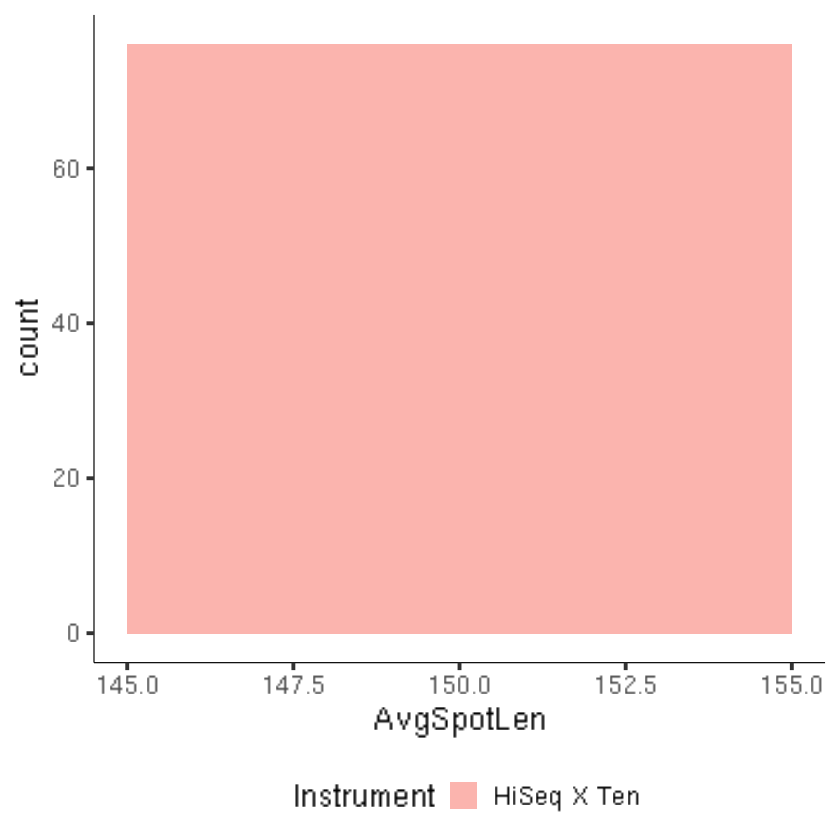

In [24]:
meta %>%
    ggplot() +
    geom_histogram(aes(x=AvgSpotLen, fill=Instrument), binwidth=10) +
    scale_fill_brewer(palette="Pastel1") +
    ggplot_theme

The samples were generated from 7 donors. 4 of the donors contributed to a large number of samples.

In [27]:
length(unique(meta$Isolate))
table(meta$Isolate)

[1] 4


D1 D2 D3 D4 
30 18 14 14 